In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
df = pd.read_csv("listings.csv")
df.description

0        Cozy, well-appointed and graciously designed s...
1        VERY CONVENIENT, WITH THE BEST LOCATION !<br /...
2        Very large & nice apartment all for you! <br /...
3        Location! Location! Location! Just bring your ...
4        <b>The space</b><br />This beautiful apartment...
                               ...                        
55099    The flat is decorated in a pure and design way...
55100    In the heart of the 15th arrondissement, this ...
55101    This pretty studio specially designed for love...
55102    Profitez d'un logement élégant et central. Le ...
55103    In the heart of the 18th arrondissement, this ...
Name: description, Length: 55104, dtype: object

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55104 entries, 0 to 55103
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    55104 non-null  float64
 1   name                  55066 non-null  object 
 2   description           54536 non-null  object 
 3   host_name             55083 non-null  object 
 4   host_response_time    30045 non-null  object 
 5   room_type             55104 non-null  object 
 6   accommodates          55104 non-null  int64  
 7   bathrooms_text        54984 non-null  object 
 8   bedrooms              46088 non-null  float64
 9   beds                  54335 non-null  float64
 10  amenities             55104 non-null  object 
 11  price                 55104 non-null  object 
 12  minimum_nights        55104 non-null  int64  
 13  maximum_nights        55104 non-null  int64  
 14  number_of_reviews     55104 non-null  int64  
 15  review_scores_ratin

In [85]:
columns = ['amenities', 'name', 'description']

In [86]:
for column in columns:
    df[column] = df[column].astype(str)

df_replacements = {'<br/>': '','<br>':'','<b>': '','</b>':'','<br />':''}
df[columns] = df[columns].replace(df_replacements, regex=True)

In [87]:
# Define stopwords and compile regular expression pattern
english_stop_words = set(stopwords.words('english'))
french_stop_words = set(stopwords.words('french'))
pattern = re.compile(r'[^a-zA-Z\s]')

In [88]:
def process_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = pattern.sub('', text.lower())

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in english_stop_words and word not in french_stop_words]

    # Join the tokens back into a sentence
    processed_text = ' '.join(tokens)

    return processed_text

texts = {}

for column in columns:
    df[column] = df[column].apply(process_text)
    texts[column] = ' '.join(df[column])

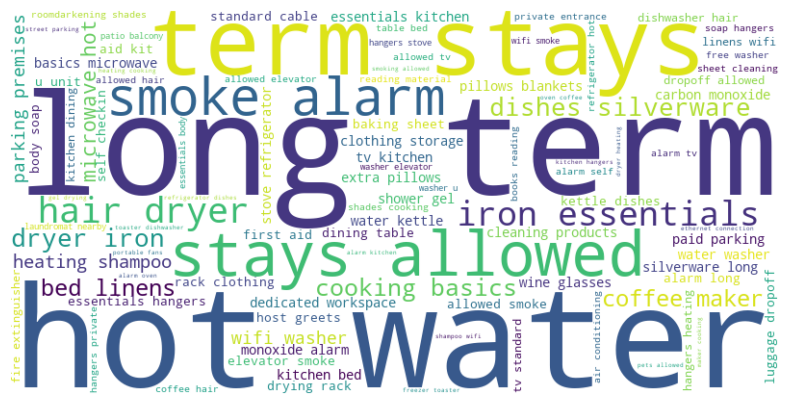

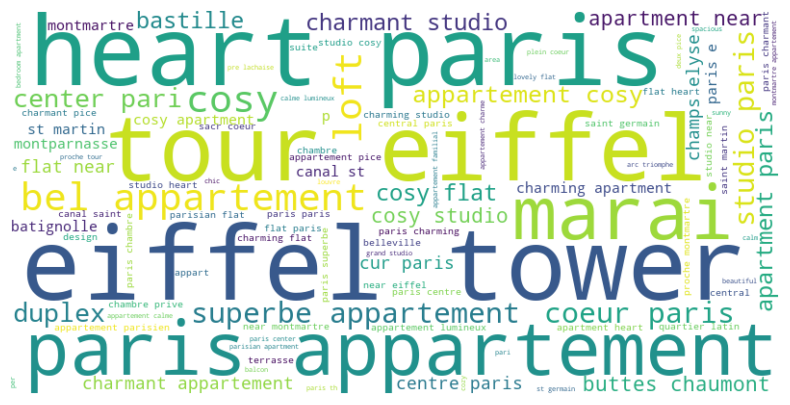

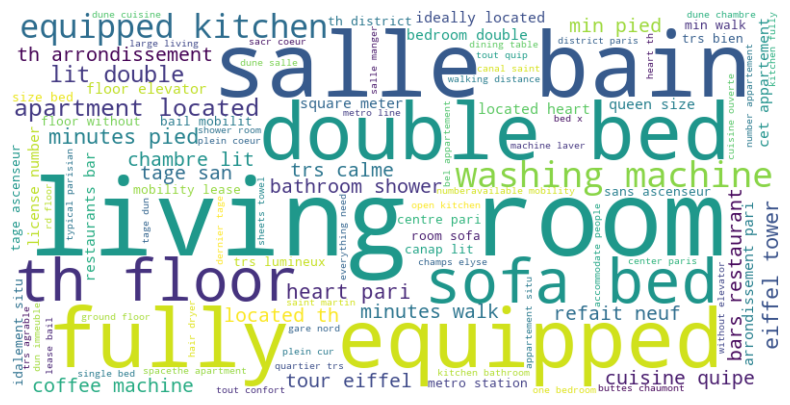

done


In [90]:
for column in columns:
    text = ' '.join(df[column])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=100).generate_from_text(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(f'{column}WordCloud.png', bbox_inches='tight',dpi=400)
    plt.show()
    plt.close()
print("done")